### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
df = pd.read_csv(r'data/placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.shape

(1000, 3)

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

### Distribution of placement_exam_marks

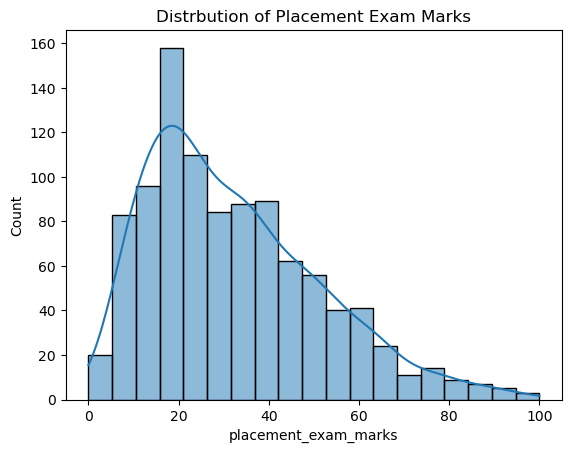

In [6]:
sns.histplot(data=df, x='placement_exam_marks', kde=True)
plt.title("Distrbution of Placement Exam Marks");

In [7]:
df['placement_exam_marks'].skew()

0.8356419499466834

* The distribution is right-skewed.

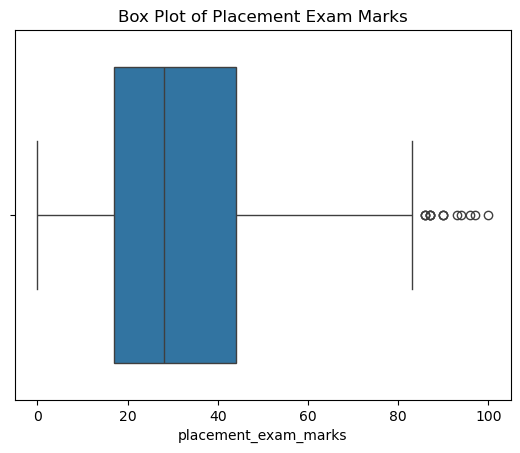

In [8]:
sns.boxplot(data=df, x='placement_exam_marks')
plt.title("Box Plot of Placement Exam Marks");

* There are outliers towards the right.

### Upper (Q3 + 1.5 * IQR) & Lower (Q1 - 1.5 * IQR) Boundaries

In [9]:
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
Q1, Q3, IQR

(17.0, 44.0, 27.0)

In [11]:
upper_boundary = Q3 + 1.5 * IQR
lower_boundary = Q1 - 1.5 * IQR

In [12]:
upper_boundary, lower_boundary

(84.5, -23.5)

### Trimming

In [13]:
trimmed_df = df[(df['placement_exam_marks'] < upper_boundary) & (df['placement_exam_marks'] > lower_boundary)]

In [14]:
trimmed_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [15]:
trimmed_df.shape

(985, 3)

* Notice the change in shape of the trimmed_df. Original df has 1000 rows whereas trimmed_df has 985 rows only.

### Distribution before and after trimming the outliers

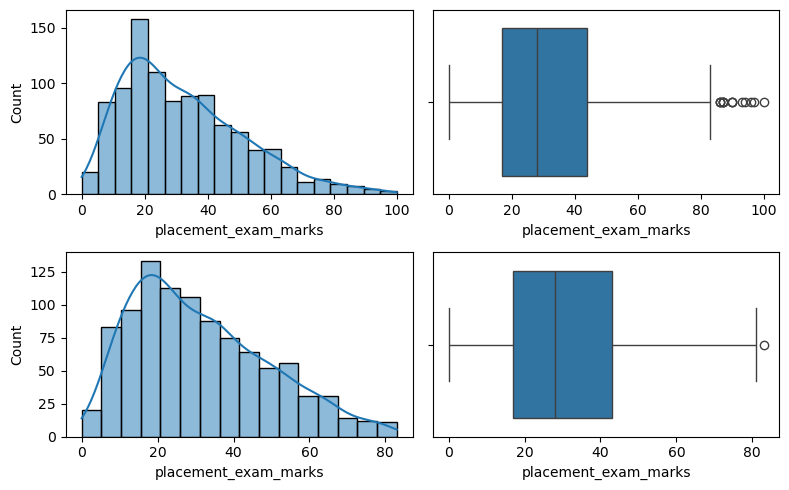

In [16]:
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
sns.histplot(data=df, x='placement_exam_marks', kde=True)

plt.subplot(2,2,2)
sns.boxplot(data=df, x='placement_exam_marks')

plt.subplot(2,2,3)
sns.histplot(data=trimmed_df, x='placement_exam_marks', kde=True)

plt.subplot(2,2,4)
sns.boxplot(data=trimmed_df, x='placement_exam_marks')

plt.tight_layout()
plt.show()

### Capping

In [17]:
cap_df = df.copy()

In [18]:
cap_df['placement_exam_marks'] = np.where(
    cap_df['placement_exam_marks'] > upper_boundary, upper_boundary, # If val > upper_limit -> replace it with upper_limit
    np.where(
        cap_df['placement_exam_marks'] < lower_boundary, lower_boundary, # If val < lower_limit -> replace it with lower_limit
        cap_df['placement_exam_marks'] # Else do not do anything
    )
)

In [19]:
cap_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [20]:
cap_df.shape

(1000, 3)

* Notice there's no change in the shape of the dataframe. Only the values which are greater than upper_boundary and lesser than lower_boundary got replace with upper_boundary and lower_boundary respectively.

### Distribution before and after capping

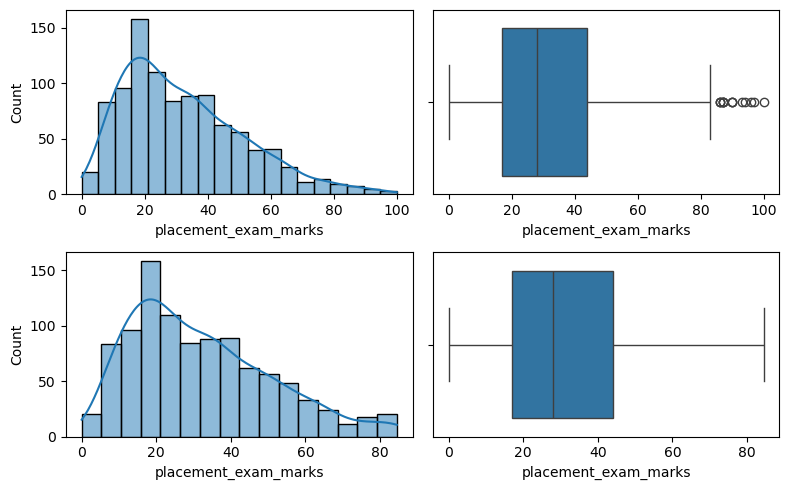

In [21]:
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
sns.histplot(data=df, x='placement_exam_marks', kde=True)

plt.subplot(2,2,2)
sns.boxplot(data=df, x='placement_exam_marks')

plt.subplot(2,2,3)
sns.histplot(data=cap_df, x='placement_exam_marks', kde=True)

plt.subplot(2,2,4)
sns.boxplot(data=cap_df, x='placement_exam_marks')

plt.tight_layout()
plt.show()